In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from scipy import pi
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import random

# equation system

$$\frac{d[S]}{dt}=-k_1[E][S]+k_{-1}[ES]$$
$$\frac{d[E]}{dt}=-k_1[E][S]+(k_{-1}+k_2)[ES]$$
$$\frac{d[ES]}{dt}=k_1[E][S]-(k_{-1}+k_2)[ES]$$
$$\frac{d[P]}{dt}=k_2[ES]\equiv v$$



# Evolution of concentrations for 5 time units

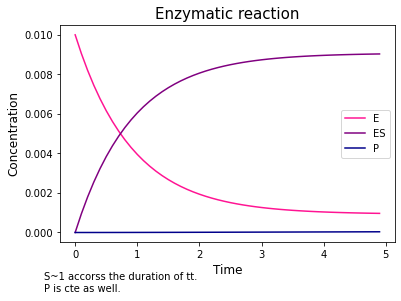

In [66]:
Ei=0.01   #y[1]
Si=1      #y[0]
ESi=0     #y[2]
Pi=0      #y[3]
k1_p=1
k1_m=0.1
k2=0.001

KM=(k1_m+k2)/k1_p

t0=0
Tf=5
dt=0.1 #time step
tt=np.arange(t0,Tf,dt) #arrange into array because odeint takes an array for t arg

def f(y,t,k1_p,k1_m,k2):
    z=np.zeros(np.size(y))
    z[0]=-k1_p*y[1]*y[0]+k1_m*y[2]
    z[1]=-k1_p*y[1]*y[0]+(k1_m+k2)*y[2]
    z[2]=k1_p*y[1]*y[0]-(k1_m+k2)*y[2]
    z[3]=k2*y[2]
    return z

y0=np.array([Si,Ei,ESi,Pi])
y_solution=spi.odeint(f,y0,tt,args=(k1_p,k1_m,k2)).T #transpose

#plt.plot(tt,y_solution[0],'deepskyblue',label="S")
plt.plot(tt,y_solution[1],'deeppink',label="E")
plt.plot(tt,y_solution[2],'purple',label="ES")
plt.plot(tt,y_solution[3],'darkblue',label="P")
#plt.hlines(xmin=0,xmax=tt[-1],y=y_solution[2][-1],color='black',label="Vmax",
#          linewidth=0.8,linestyle="dashed")
#plt.hlines(xmin=0,xmax=tt[-1],y=y_solution[2][-1]/2,color='red',label="Vmax/2",
#          linewidth=1.8,linestyle="dashed")
#plt.plot(y_solution[:,1],y_solution[:,0],'deeppink',label='Y')
plt.legend(loc="best")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Concentration", fontsize=12)
plt.title("Enzymatic reaction", fontsize="15")
plt.text(s="S~1 accorss the duration of tt.\nP is cte as well.",y=-0.003,x=-0.5)
plt.show()

# Evolution of concentrations for 100,000 time units

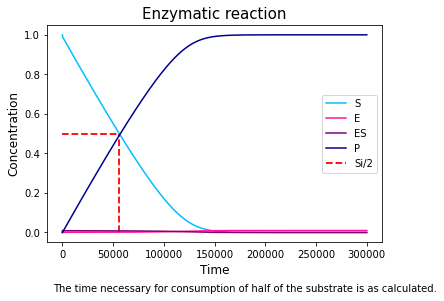

In [109]:
t0=0
Tf=300000
dt=10 #time step
tt=np.arange(t0,Tf,dt) #arrange into array because odeint takes an array for t arg

def f(y,t,k1_p,k1_m,k2):
    z=np.zeros(np.size(y))
    z[0]=-k1_p*y[1]*y[0]+k1_m*y[2]
    z[1]=-k1_p*y[1]*y[0]+(k1_m+k2)*y[2]
    z[2]=k1_p*y[1]*y[0]-(k1_m+k2)*y[2]
    z[3]=k2*y[2]
    return z

y0=np.array([Si,Ei,ESi,Pi])
y_solution=spi.odeint(f,y0,tt,args=(k1_p,k1_m,k2)).T #transpose

plt.plot(tt,y_solution[0],'deepskyblue',label="S")
plt.plot(tt,y_solution[1],'deeppink',label="E")
plt.plot(tt,y_solution[2],'purple',label="ES")
plt.plot(tt,y_solution[3],'darkblue',label="P")

plt.vlines(ymin=0,ymax=0.5,x=55555,color='red',
          linewidth=1.8,linestyle="dashed")
plt.hlines(xmin=0,xmax=55555,y=y_solution[0][0]/2,color='red',label="Si/2",
         linewidth=1.8,linestyle="dashed")

plt.legend(loc="best")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Concentration", fontsize=12)
plt.title("Enzymatic reaction", fontsize="15")
plt.text(s="The time necessary for consumption of half of the substrate is as calculated.",y=-0.3,x=-9000)
plt.show()

<ipython-input-131-29d91af7e7f5>:17: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(y_solution[0],y_solution[3]/tt,'green',label="P vs. S")


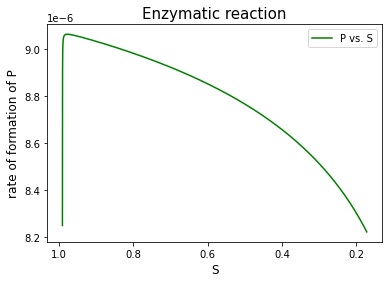

In [131]:
t0=0
Tf=100000
dt=10 #time step
tt=np.arange(t0,Tf,dt) #arrange into array because odeint takes an array for t arg

def f(y,t,k1_p,k1_m,k2):
    z=np.zeros(np.size(y))
    z[0]=-k1_p*y[1]*y[0]+k1_m*y[2]
    z[1]=-k1_p*y[1]*y[0]+(k1_m+k2)*y[2]
    z[2]=k1_p*y[1]*y[0]-(k1_m+k2)*y[2]
    z[3]=k2*y[2]
    return z

y0=np.array([Si,Ei,ESi,Pi])
y_solution=spi.odeint(f,y0,tt,args=(k1_p,k1_m,k2)).T #transpose

plt.plot(y_solution[0],y_solution[3]/tt,'green',label="P vs. S")

#plt.plot(y_solution[:,1],y_solution[:,0],'deeppink',label='Y')
plt.legend(loc="best")
plt.xlabel("S", fontsize=12)
plt.gca().invert_xaxis()
plt.ylabel("rate of formation of P", fontsize=12)
plt.title("Enzymatic reaction", fontsize="15")
#plt.text(s="The time necessary for consumption of half of the substrate is as calculated.",loc="best")
plt.show()

# Comments

The enzyme was saturated after a few units of time (4-5), as shown on the first plot. The concentrations of E and ES were since then stationary. It took ~55,555 time units to consume half of the substrate (plot 2). The rate was at its peak while the substrate was at its highest concentrateion as well. The vmax (=the highest rate) is slighty above calculated 9xe-6 (plot 3). 

# Michaelis-Menten equation 

Plot $[P] ~ [S]$ using :

$$ v=\frac{d[P]}{dt}=\frac{vmax[S]}{Km+[S]}$$


vmax=9e-06
Km=0.101


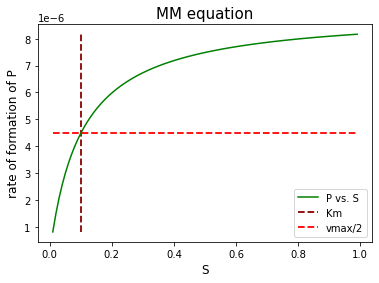

In [151]:
vmax=0.009*k2;  print("vmax={}".format(vmax))
Km=(k1_m+k2)/k1_p;   print("Km={}".format(Km))

def MM(vmax,Km,S):
    dP=[vmax*s/(Km+s) for s in S]
    return dP

S=np.arange(0.01,1,0.01)
P=MM(vmax=vmax,Km=Km,S=S)
plt.plot(S,P,'green',label="P vs. S")

#plt.plot(y_solution[:,1],y_solution[:,0],'deeppink',label='Y')
plt.vlines(ymin=P[0],ymax=P[-1],x=Km,color='darkred',
          linewidth=1.8,linestyle="dashed",label="Km")
plt.hlines(xmin=S[0],xmax=S[-1],y=vmax/2,color='red',label="vmax/2",
         linewidth=1.8,linestyle="dashed")
plt.legend(loc="lower right")
plt.xlabel("S", fontsize=12)
#plt.gca().invert_xaxis()
plt.ylabel("rate of formation of P", fontsize=12)
plt.title("MM equation", fontsize="15")

#plt.text(s="The time necessary for consumption of half of the substrate is as calculated.",loc="best")
plt.show()

The reaction would produce P at the half of the maximum rate with initial concentration of S = Km = 0.101.